In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import matplotlib as mplot
import re
from wordcloud import WordCloud

In [2]:
Reviews = pd.read_csv('./Data/Reviews.csv', nrows=100000)

In [3]:
Reviews.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
n_reviews = len(Reviews)
n_products = Reviews.ProductId.unique().size
n_users = Reviews.UserId.unique().size

print("Number of Reviews: {:d}".format(n_reviews))
print("Number of Prodcuts: {:d}".format(n_products))
print("Number of Users:  {:d}".format(n_users))

Number of Reviews: 100000
Number of Prodcuts: 12560
Number of Users:  70396


# Score distribution

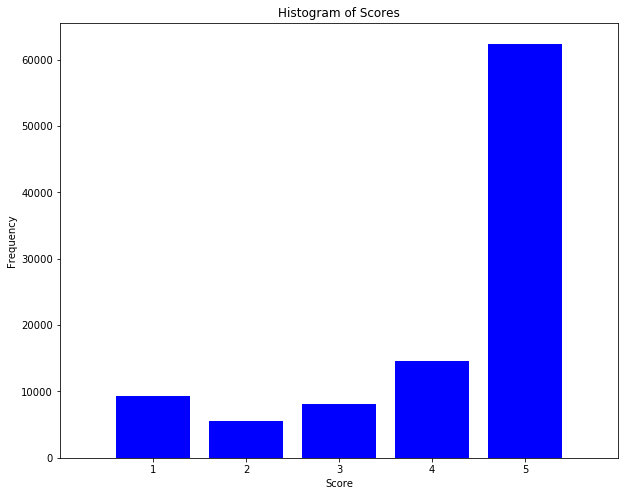

In [5]:
counts = np.bincount(Reviews.Score)

fig, ax = plt.subplots(figsize=(10, 8))
ax.bar(range(1,6), counts[1:], width=0.8, align='center', color="blue")
ax.set(xticks=range(1,6), xlim=[0, 6], xlabel='Score', ylabel='Frequency', title='Histogram of Scores')
plt.show()

In [6]:
# Summary of number of reviews for each product
Reviews['ProductId'].value_counts().describe()

count    12560.000000
mean         7.961783
std         28.363634
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max        632.000000
Name: ProductId, dtype: float64

# What's the score distribution of more popular products (with at least 5 reviews) look like? 

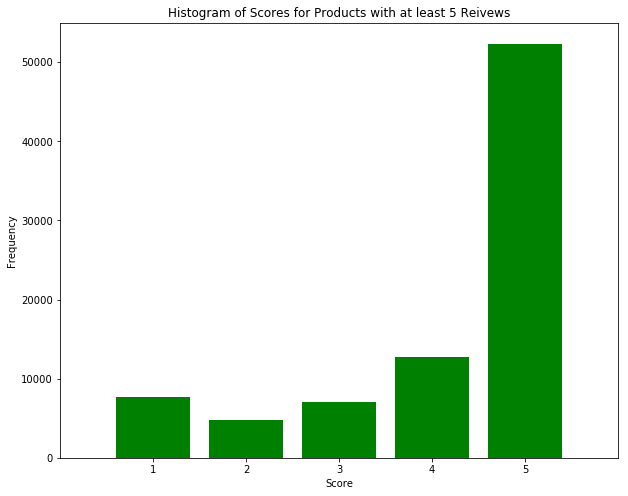

In [7]:
Reviews_grp = Reviews.groupby('ProductId').filter(lambda x: len(x) >= 5)

counts2 = np.bincount(Reviews_grp.Score)

fig, ax = plt.subplots(figsize=(10, 8))
ax.bar(range(1,6), counts2[1:], width=0.8, align='center', color="green")
ax.set(xticks=range(1,6), xlim=[0, 6], xlabel='Score', ylabel='Frequency', 
       title='Histogram of Scores for Products with at least 5 Reivews')
plt.show()

In [8]:
#Text cleaning to remove numbers and special charaters

def Word_cleaning(entry):
    entry_low = entry.lower()
    Only_words = re.sub('[^a-z]+', ' ', entry_low).strip()
    #words = Only_words.split()
    
    return(Only_words)

In [9]:
Reviews["Summary_Clean"] = Reviews["Summary"].apply(lambda item: Word_cleaning(str(item)))

In [10]:
Reviews["Summary_Clean"].head()

0    good quality dog food
1        not as advertised
2      delight says it all
3           cough medicine
4              great taffy
Name: Summary_Clean, dtype: object

In [11]:
# Vectorize Summary_Clean

vectorizer = CountVectorizer(min_df=1, stop_words='english')
Reviews_Clean_Summary = vectorizer.fit_transform(Reviews["Summary_Clean"])
#vectorizer.get_feature_names()
x = vectorizer.transform(Reviews["Summary_Clean"])
#x[x>1] = 1
x = x.toarray()
u = np.sum(x, axis=0)

In [12]:
#Stop words removed
num_samples, num_features = Reviews_Clean_Summary.shape
print(num_samples, num_features)

100000 14587


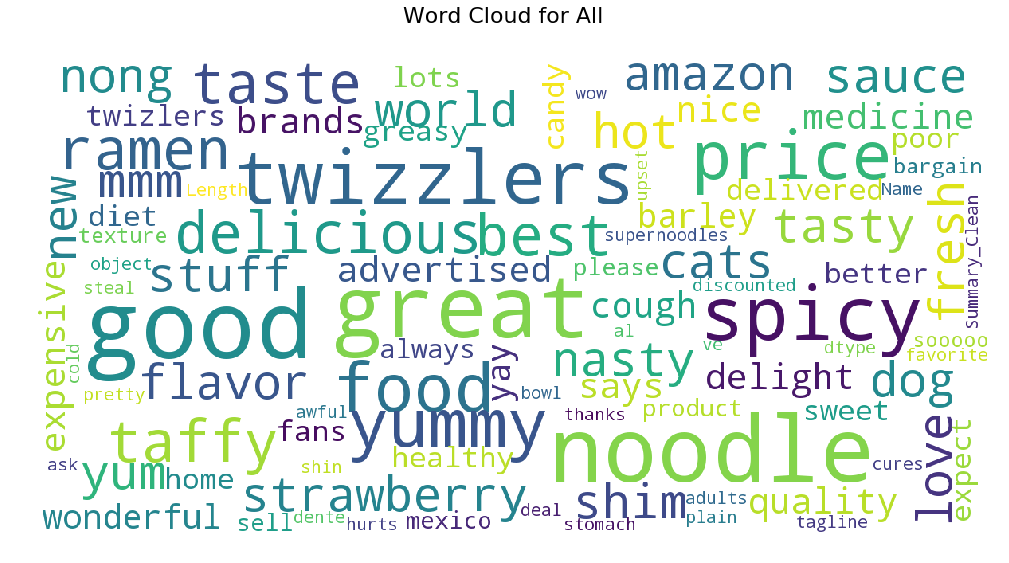

In [13]:
# Make a word cloud

def plot_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='White',  
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=10 
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(14, 14))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=22)
        fig.tight_layout()
        fig.subplots_adjust(top=1.35)

    plt.imshow(wordcloud)
    plt.show()
    
plot_wordcloud(Reviews["Summary_Clean"], 'Word Cloud for All')

# Word Cloud for the Lowest Score

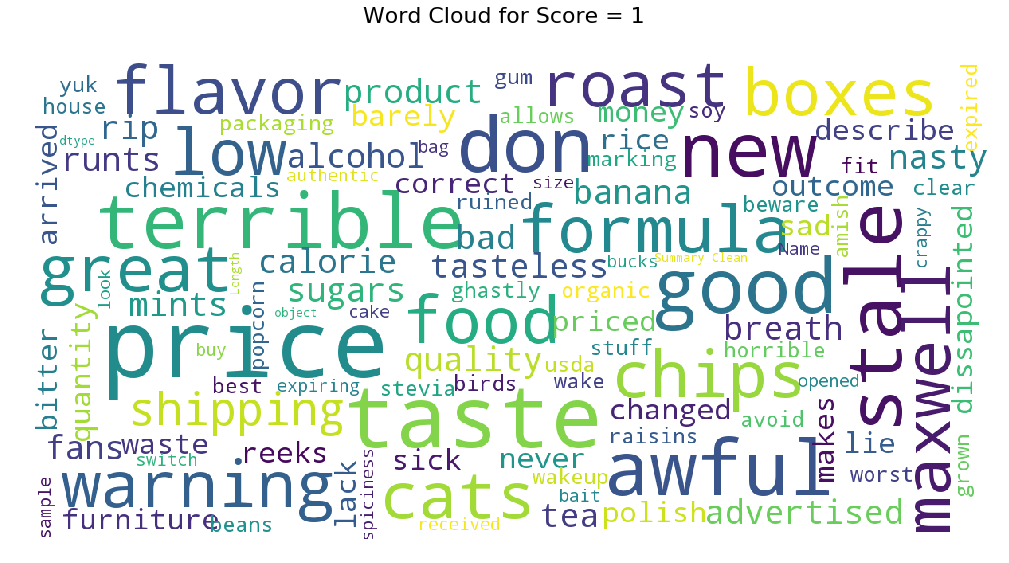

In [14]:
plot_wordcloud(Reviews[Reviews.Score == 1]["Summary_Clean"], title = "Word Cloud for Score = 1")

# Word Cloud for the Highest Score

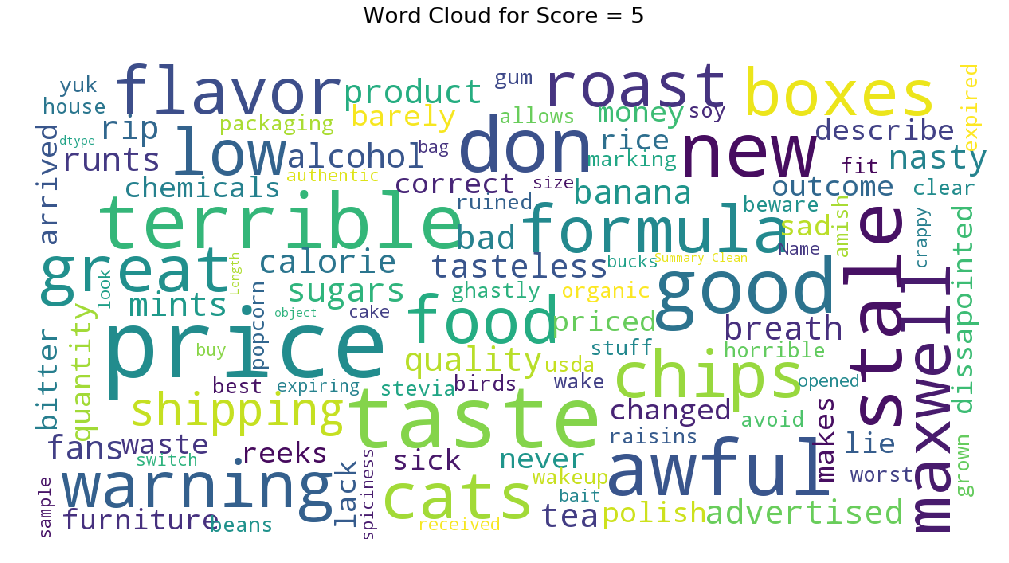

In [15]:
plot_wordcloud(Reviews[Reviews.Score == 1]["Summary_Clean"], title = "Word Cloud for Score = 5")